<a href="https://colab.research.google.com/github/riya25999/Codtech/blob/main/Task61.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Install necessary libraries (if not already installed)
!pip install tensorflow keras

# Import libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Training data shape: (50000, 32, 32, 3), Labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3), Labels shape: (10000, 1)


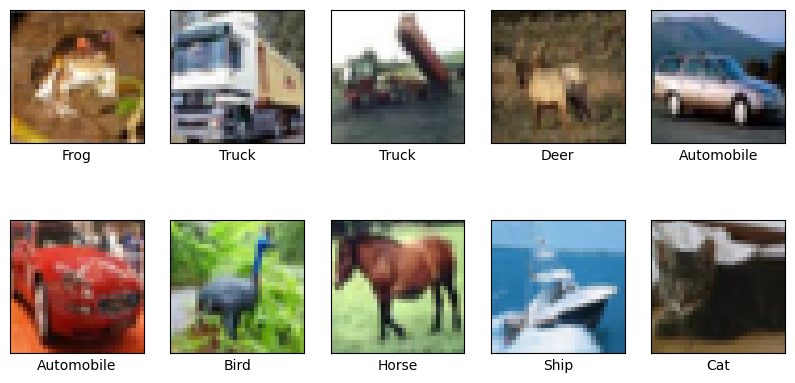

In [ ]:

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Normalize the pixel values (0 to 1 range)
X_train, X_test = X_train / 255.0, X_test / 255.0

# Display the shape of the data
print(f"Training data shape: {X_train.shape}, Labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}, Labels shape: {y_test.shape}")

# Visualize a few images from the dataset
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [ ]:

# Define the CNN model architecture
model = models.Sequential([
    # Convolutional layer 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Convolutional layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Convolutional layer 3
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten layer
    layers.Flatten(),

    # Fully connected layers
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

# Display the model's architecture
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:

# Train the model on the CIFAR-10 dataset
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test), batch_size=64)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 77ms/step - accuracy: 0.8249 - loss: 0.4953 - val_accuracy: 0.7056 - val_loss: 0.9153
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 79ms/step - accuracy: 0.8343 - loss: 0.4657 - val_accuracy: 0.7041 - val_loss: 0.9442
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 77ms/step - accuracy: 0.8460 - loss: 0.4335 - val_accuracy: 0.7086 - val_loss: 0.9257
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 79ms/step - accuracy: 0.8561 - loss: 0.4038 - val_accuracy: 0.7127 - val_loss: 0.9503
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 78ms/step - accuracy: 0.8647 - loss: 0.3839 - val_accuracy: 0.7035 - val_loss: 1.0112
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 77ms/step - accuracy: 0.8673 - loss: 0.3677 - val_accuracy: 0.7034 - val_loss: 1.0787
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 77ms/step - accuracy: 0.8777 - loss: 0.3477 - val_accuracy: 0.7042 - val_loss: 1.0706
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 78ms/step - accuracy: 0.8871 - loss: 0.3201 - 

In [ ]:

# Evaluate the model's performance
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc * 100:.2f}%")

313/313 - 4s - 14ms/step - accuracy: 0.6984 - loss: 1.1828
Test accuracy: 69.84%


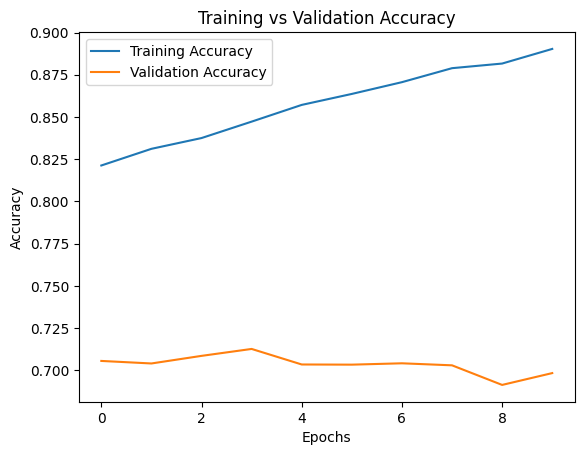

In [ ]:

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


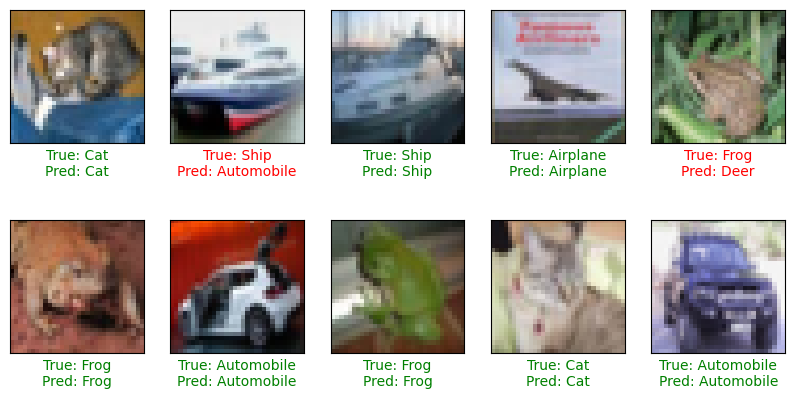

In [ ]:

# Make predictions on test data
predictions = model.predict(X_test)

# Display some predictions with their true labels
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    pred_label = class_names[predictions[i].argmax()]
    true_label = class_names[y_test[i][0]]
    plt.xlabel(f"True: {true_label}\nPred: {pred_label}", color='green' if pred_label == true_label else 'red')
plt.show()